# Cho dữ liệu economy.xlsx. 
## Bộ dữ liệu chứa thông tin về các tỷ lệ Interest_Rate, Unemployment_Rate và Stock_Index_Price theo thời gian (năm, tháng). 
## Người ta dự đoán Stock_Index_Price dựa trên Interest_Rate, hoặc Unemployment_Rate hoặc cả 2.
 
## Yêu cầu:
### Đọc dữ liệu, tiền xử lý dữ liệu, tổng quan ban đầu về dữ liệu.

### 1. Single variable
* Thực hiện Simple Linear Regression để dự đoán Stock_Index_Price từ Interest_Rate, với các đánh giá mô hình: (Cross-Validation)
* Nhận xét kết quả. Trực quan hóa kết quả.
* Kiểm chứng overfiting, underfitting của model vừa chọn
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

### 2. Multiple variables
* Thực hiện Multiple Linear Resgression để dự đoán Stock_Index_Price từ Interest_Rate, Unemployment_Rate. với các đánh giá mô hình: (Cross-Validation)
* Nhận xét kết quả. Trực quan hóa kết quả.
* Kiểm chứng overfiting, underfitting của model vừa chọn
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
import re
warnings.filterwarnings('ignore')

In [7]:
economy = pd.read_excel('data8/Ex3_Economy/economy.xlsx')
economy

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


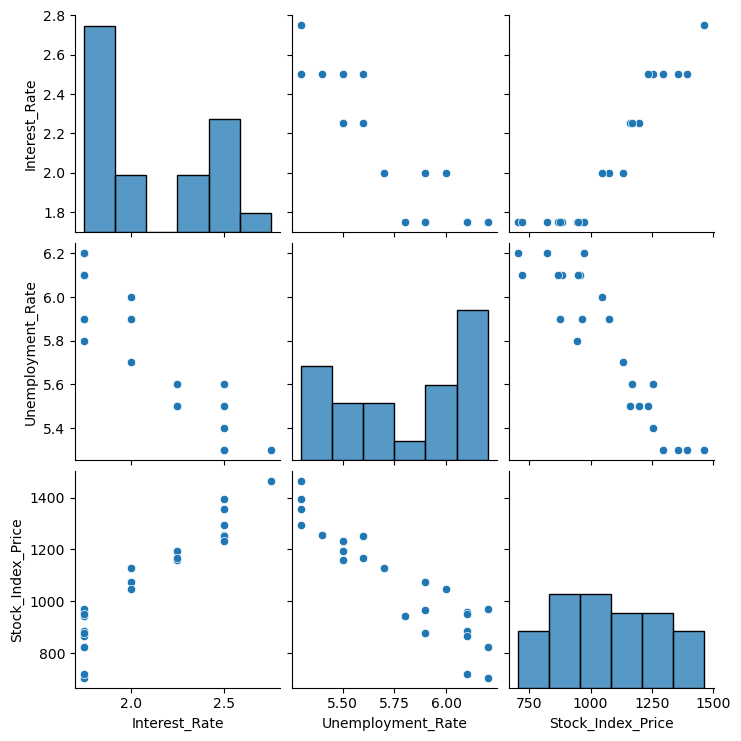

In [26]:
sbn.pairplot(economy[['Interest_Rate', 'Unemployment_Rate', 'Stock_Index_Price']]);

### <span style='color:red'>1. Single variable
* Thực hiện Simple Linear Regression để dự đoán Stock_Index_Price từ Interest_Rate, với các đánh giá mô hình: (Cross-Validation)
* Nhận xét kết quả. Trực quan hóa kết quả.
* Kiểm chứng overfiting, underfitting của model vừa chọn
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

### <span style='color:blue'>Single Linear

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [82]:
x_single = economy[['Interest_Rate']]
y_single = economy['Stock_Index_Price']

steps_linear = [
    ("Minmax scale", MinMaxScaler()),
    ("Single LR", LinearRegression())
]

pipe_single = Pipeline(steps_linear)
pipe_single.fit(x_single, y_single)

Pipeline(steps=[('Minmax scale', MinMaxScaler()),
                ('Single LR', LinearRegression())])

Mean R^2 score of simple LR:  -1.7230068581065319
Mean MSE score of simple LR:  9956.453539377597



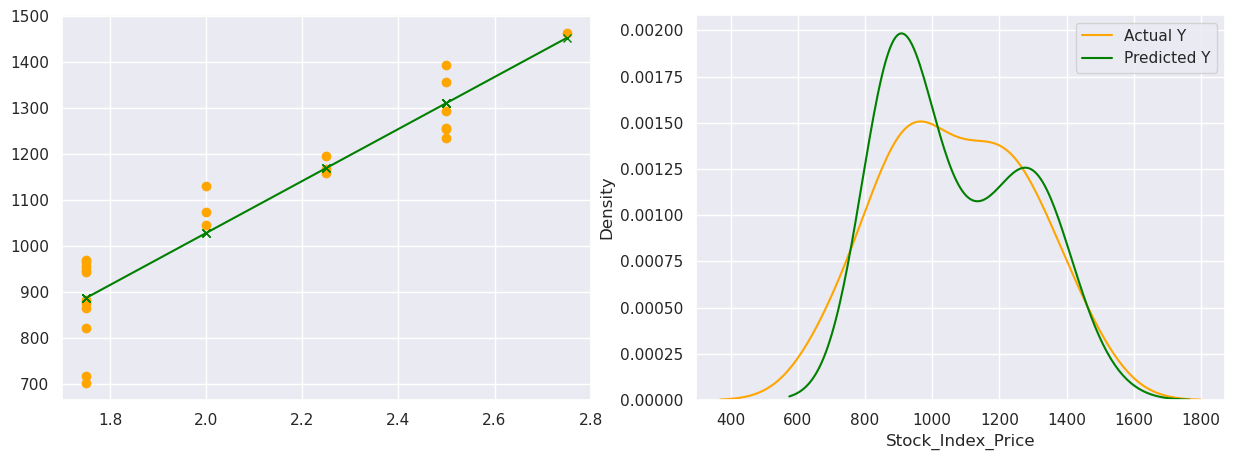

In [83]:
print("Mean R^2 score of simple LR: ", cross_val_score(pipe_single, x_single, y_single, cv=5).mean())
print("Mean MSE score of simple LR: ", -1*cross_val_score(pipe_single, x_single, y_single, cv=5, scoring='neg_mean_squared_error').mean())

print()
sbn.set_theme(style='darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x_single, y_single, c='orange', label='Actual points')
plt.plot(x_single, pipe_single.predict(x_single), marker='x', c='green', label='Predicted line')

plt.subplot(1,2,2)
sbn.distplot(y_single, color='orange', label='Actual Y', hist=False)
sbn.distplot(pipe_single.predict(x_single), color='green', label='Predicted Y', hist=False)
plt.legend()
plt.show()

### The R^2 are < 0 and the mean MSE are too high => the single linear model is not suitable
### The distplot of actual Y and predicted Y also don't fit well

### <span style='color:blue'>Single Polynomial

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
steps_polynomial = [
    ("Minmax scale", MinMaxScaler()),
    ("Polynomial feature", PolynomialFeatures(degree=2)),
    ("Single LR", LinearRegression())
]
pipe_single_pf = Pipeline(steps_polynomial)

pipe_single_pf.fit(x_single, y_single)

Pipeline(steps=[('Minmax scale', MinMaxScaler()),
                ('Polynomial feature', PolynomialFeatures()),
                ('Single LR', LinearRegression())])

Mean R^2 score of simple polynomial reg:  -2.8344984474120154
Mean MSE score of simple  polynomial reg:  14205.046747514203



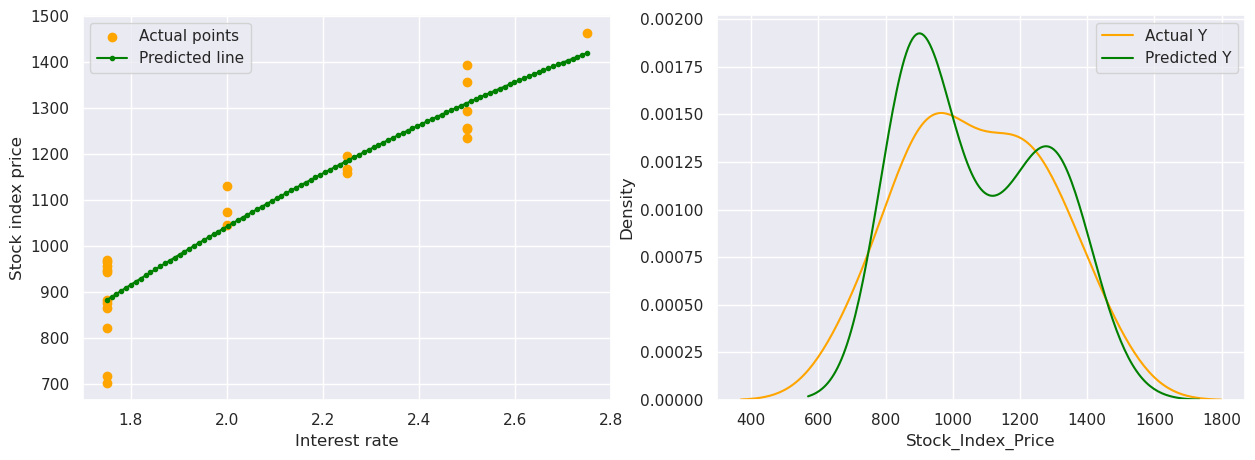

In [106]:
print("Mean R^2 score of simple polynomial reg: ", cross_val_score(pipe_single_pf, x_single, y_single, cv=5).mean())
print("Mean MSE score of simple  polynomial reg: ", -1*cross_val_score(pipe_single_pf, x_single, y_single, cv=5, scoring='neg_mean_squared_error').mean())

print()
sbn.set_theme(style='darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(x_single, y_single, c='orange', label='Actual points')

x_plot = np.linspace(x_single.min(), x_single.max(), 100).reshape(-1, 1) #Create many x points for smooth curve
y_single_poly_plot = pipe_single_pf.predict(x_single_poly_plot)
plt.plot(x_plot, y_single_poly_plot, marker='.', c='green', label='Predicted line')
plt.legend()
plt.xlabel('Interest rate')
plt.ylabel('Stock index price')

plt.subplot(1,2,2)
sbn.distplot(y_single, color='orange', label='Actual Y', hist=False)
sbn.distplot(pipe_single_pf.predict(x_single), color='green', label='Predicted Y', hist=False)
plt.legend()
plt.show()

### At degree=3 (most optimized), R^2 and mean MSE are still not good
### The line and distplots show the same

### <span style='color:red'>2. Multiple variables
* Thực hiện Multiple Linear Resgression để dự đoán Stock_Index_Price từ Interest_Rate, Unemployment_Rate. với các đánh giá mô hình: (Cross-Validation)
* Nhận xét kết quả. Trực quan hóa kết quả.
* Kiểm chứng overfiting, underfitting của model vừa chọn
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

### <span style='color:yellow'>Multiple Linear

In [103]:
x_multi = economy[['Interest_Rate', 'Unemployment_Rate']]
y_multi = economy['Stock_Index_Price']

In [104]:
pipe_multi = Pipeline(steps_linear)
pipe_multi.fit(x_multi, y_multi)

Pipeline(steps=[('Minmax scale', MinMaxScaler()),
                ('Single LR', LinearRegression())])

Mean R^2 score of multi LR:  -1.9162523516942946
Mean MSE score of multi LR:  9308.12684498346



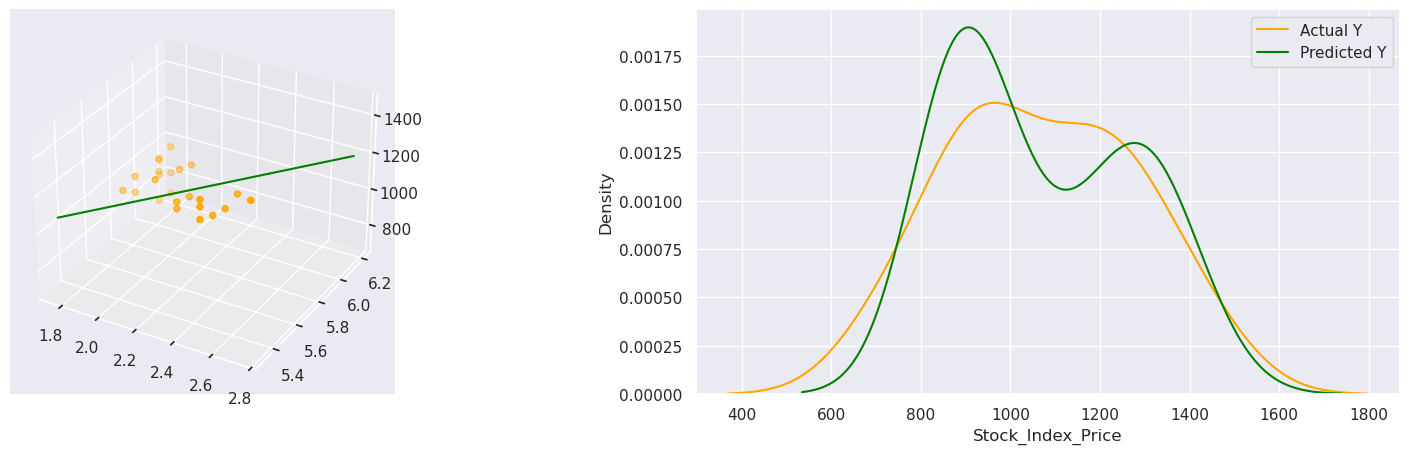

In [122]:
print("Mean R^2 score of multi LR: ", cross_val_score(pipe_multi, x_multi, y_multi, cv=5).mean())
print("Mean MSE score of multi LR: ", -1*cross_val_score(pipe_multi, x_multi, y_multi, cv=5, scoring='neg_mean_squared_error').mean())

print()
from mpl_toolkits.mplot3d import Axes3D
sbn.set_theme(style='darkgrid')
f = plt.figure(figsize=(20,5))

ax = f.add_subplot(121, projection='3d')
x_1_regplot = np.linspace(x_multi['Interest_Rate'].min(), x_multi['Interest_Rate'].max(), 100)
x_2_regplot = np.linspace(x_multi['Unemployment_Rate'].min(), x_multi['Unemployment_Rate'].max(), 100)
y_regplot = pipe_multi.predict(np.array([x_1_regplot, x_2_regplot]).transpose())
ax.scatter(x_multi['Interest_Rate'], x_multi['Unemployment_Rate'], y_multi, c='orange', label='Actual points')
ax.plot(x_1_regplot, x_2_regplot, y_regplot, c='green', label='Predicted line')

plt.subplot(1,2,2)
sbn.distplot(y_multi, color='orange', label='Actual Y', hist=False)
sbn.distplot(pipe_multi.predict(x_multi), color='green', label='Predicted Y', hist=False)
plt.legend()
plt.show()

### <span style='color:yellow'>Multiple Polynomial

In [143]:
steps_polynomial = [
    ("Minmax scale", MinMaxScaler()),
    ("Polynomial feature", PolynomialFeatures(degree=2)),
    ("Single LR", LinearRegression())
]
pipe_multi_pf = Pipeline(steps_polynomial)
pipe_multi_pf.fit(x_multi, y_multi)

Pipeline(steps=[('Minmax scale', MinMaxScaler()),
                ('Polynomial feature', PolynomialFeatures()),
                ('Single LR', LinearRegression())])

Mean R^2 score of multi poly reg:  -4.849604748637963
Mean MSE score of multi poly reg:  19677.96421982701



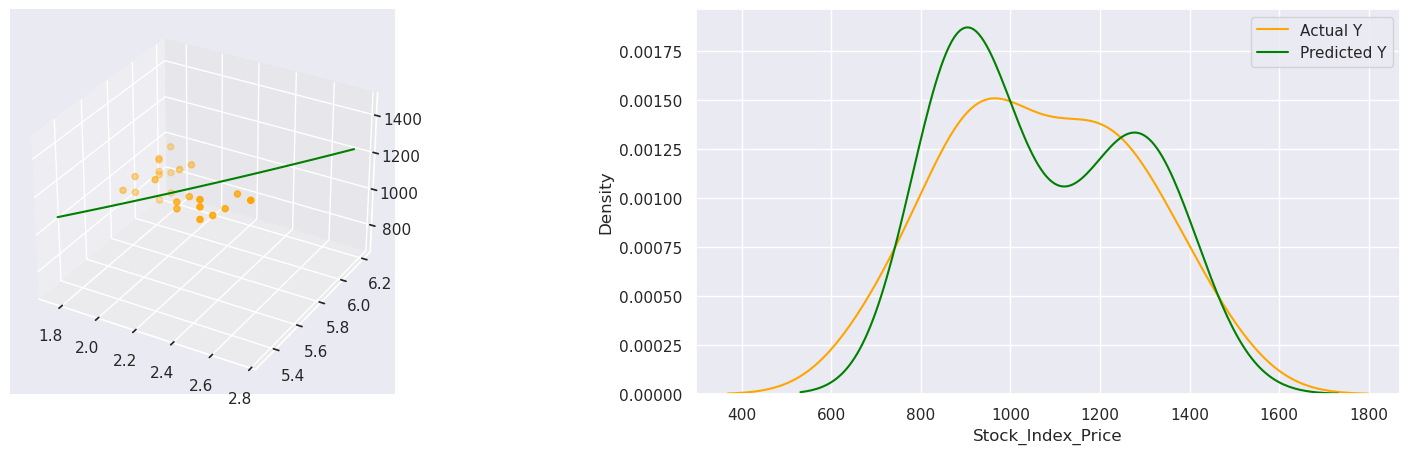

In [144]:
print("Mean R^2 score of multi poly reg: ", cross_val_score(pipe_multi_pf, x_multi, y_multi, cv=5).mean())
print("Mean MSE score of multi poly reg: ", -1*cross_val_score(pipe_multi_pf, x_multi, y_multi, cv=5, scoring='neg_mean_squared_error').mean())

print()
from mpl_toolkits.mplot3d import Axes3D
sbn.set_theme(style='darkgrid')
f = plt.figure(figsize=(20,5))

ax = f.add_subplot(121, projection='3d')
x_1_regplot = np.linspace(x_multi['Interest_Rate'].min(), x_multi['Interest_Rate'].max(), 100)
x_2_regplot = np.linspace(x_multi['Unemployment_Rate'].min(), x_multi['Unemployment_Rate'].max(), 100)
y_regplot = pipe_multi_pf.predict(np.array([x_1_regplot, x_2_regplot]).transpose())
ax.scatter(x_multi['Interest_Rate'], x_multi['Unemployment_Rate'], y_multi, c='orange', label='Actual points')
ax.plot(x_1_regplot, x_2_regplot, y_regplot, c='green', label='Predicted line')

plt.subplot(1,2,2)
sbn.distplot(y_multi, color='orange', label='Actual Y', hist=False)
sbn.distplot(pipe_multi_pf.predict(x_multi), color='green', label='Predicted Y', hist=False)
plt.legend()
plt.show()